In [1]:
from tools import *
%matplotlib inline

# Chap2 获取文本语料库 和 词汇资源

目的：

1.  什么是有用的文本语料库和词汇资源？如何使用 Python 获取它们？
2.  哪些 Python 结构最适合这项工作？
3.  编写 Python 代码时如何避免重复的工作？

## 2.2 条件频率分布
是频率分布的集合，每个频率分布有一个不同的“条件”。

### 2.2.1 条件 和 事件

-   频率分布计算观察到的事件。
-   条件频率分布需要给每个事件关联一个条件，所以处理的是一系列配对序列

配对序列中每对的形式是：(condition, 事件 ) 根据 condition（条件）统计 event (事件) 的频率。

In [2]:
text=['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
pairs=[('news', 'The'), ('news', 'Fulton'), ('news', 'County'),...]
print("text= ", text)
print("pairs= ", pairs)

text=  ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', Ellipsis]
pairs=  [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), Ellipsis]


### 2.2.2 按文体计数词汇

In [3]:
from nltk.corpus import brown

cfd=nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
)
cfd.tabulate(samples=['the', 'cute', ' Monday', 'could', 'will'])

            the    cute  Monday   could    will 
   news    5580       0       0      86     389 
romance    2758       2       0     193      43 


In [4]:
genre_word = [
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
]
print("genre word count= ", len(genre_word))
print("genre_word[:4]= ",genre_word[:4])
print("genre_word[-4:]= ",genre_word[-4:])

genre word count=  170576
genre_word[:4]=  [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]
genre_word[-4:]=  [('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


In [5]:
cfd = nltk.ConditionalFreqDist(genre_word)
print("cfd.conditions()= ", cfd.conditions())

cfd.conditions()=  ['news', 'romance']


In [6]:
show_subtitle("cfd['news']")
cfd['news']

--------------- >cfd['news']< ---------------


FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [7]:
show_subtitle("cfd['romance']")
cfd['romance']

--------------- >cfd['romance']< ---------------


FreqDist({',': 3899, '.': 3736, 'the': 2758, 'and': 1776, 'to': 1502, 'a': 1335, 'of': 1186, '``': 1045, "''": 1044, 'was': 993, ...})

In [8]:
print("cfd['romance'].most_common(20=", cfd['romance'].most_common(20))

cfd['romance'].most_common(20= [(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]


In [9]:
print("cfd['romance']['could']= ", cfd['romance']['could'])

cfd['romance']['could']=  193


### 2.2.3 绘制分布图 显示分布表

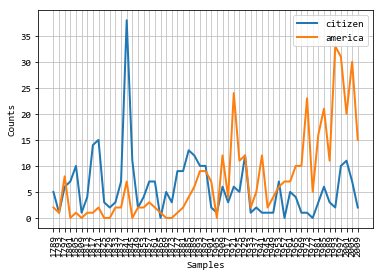

        1789 1793 1797 
america    2    1    8 
citizen    5    1    6 


In [10]:
from nltk.corpus import inaugural

cfd=nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)
cfd.plot()
cfd.tabulate(samples=['1789', '1793', '1797'])

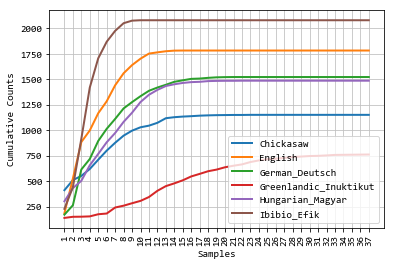

                  1    2    3    4    5    6    7    8    9 
       English  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch  171  263  614  717  894 1013 1110 1213 1275 


In [11]:
from nltk.corpus import udhr

languages=['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd=nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang+'-Latin1')
)
cfd.plot(cumulative=True)
cfd.tabulate(
    conditions=['English', 'German_Deutsch'], 
    samples=range(1,10,1), 
    cumulative=True
)

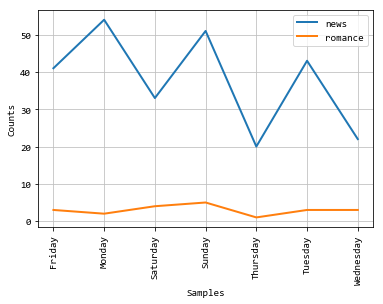

           Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   news        41        54        33        51        20        43        22 
romance         3         2         4         5         1         3         3 


In [13]:
from nltk.corpus import brown

days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cfd=nltk.ConditionalFreqDist(
    (genre, word)
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
    if word in days
)
cfd.plot()
cfd.tabulate(samples=sorted(days))

### 2.2.4 使用二元语法（双边词）生成随机文本
nltk.bigrams()生成连续的词对链表

In [17]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.for ']
print(list(nltk.bigrams(sent)))

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.for ')]


In [30]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

# 打印出来的结果 和 直接访问的结果不一样
print("bigrams= ", bigrams)
print("cfd['living']= ",cfd['living'])
print("dict(cfd['living'])= ", dict(cfd['living']))
print("cfd['living'].max()= ", cfd['living'].max())
print("cfd['finding'].max()= ", cfd['finding'].max())

bigrams=  <generator object bigrams at 0x0000000010BEFD58>
cfd['living']=  <FreqDist with 6 samples and 16 outcomes>
dict(cfd['living'])=  {'creature': 7, 'thing': 4, 'soul': 1, '.': 1, 'substance': 2, ',': 1}
cfd['living'].max()=  creature
cfd['finding'].max()=  him


In [34]:
# P59 Ex2-1 产生随机文本
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()  # 选择与原单词匹配度最大的单词作为下一个单词
    print()

show_subtitle('living')
generate_model(cfd, 'living')
show_subtitle('beginning')
generate_model(cfd, 'beginning')
show_subtitle('finding')
generate_model(cfd, 'finding')

--------------- >living< ---------------
living creature that he said , and the land of the land of the land 
--------------- >beginning< ---------------
beginning of the land of the land of the land of the land of the 
--------------- >finding< ---------------
finding him , and the land of the land of the land of the land 


P59, 表2-4：NLTK 中的条件频率分布：定义、访问和可视化一个计数条件频率分布的常用方法和习惯用法